# Lorenz Equations

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from scipy.stats import uniform
from scipy.linalg import norm

In [8]:
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
import matplotlib.animation as manimation
animation.writers.list()

['pillow', 'html']

In [3]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [4]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    # Define Constants
    sigma = 10
    rho = 28
    beta = 8/3
    x, y, z = x
    # Compute derivatives
    dx_dt = sigma * (y - x)
    dy_dt = rho * x - y - x * z
    dz_dt = x * y - beta * z
    
    return np.array([dx_dt, dy_dt, dz_dt])

<IPython.core.display.Javascript object>


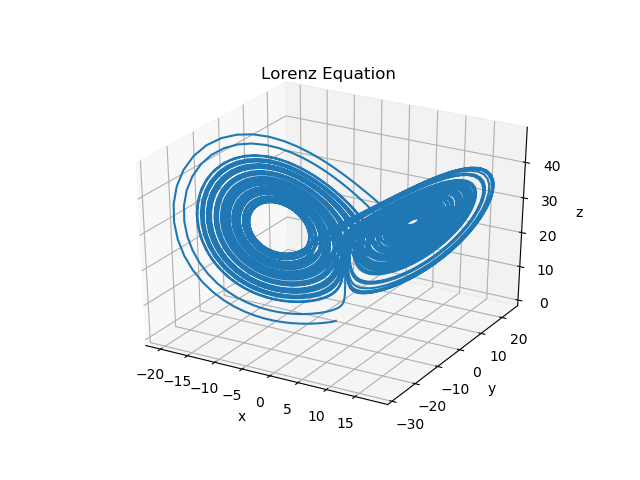

In [10]:
y_0 = uniform(-15, 15).rvs(3)
t = np.linspace(0, 100, 10000)
sol = odeint(lorenz, y_0, t)

ax = plt.axes(projection="3d")
ax.plot3D(sol[:,0], sol[:,1], sol[:,2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Lorenz Equation")

plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


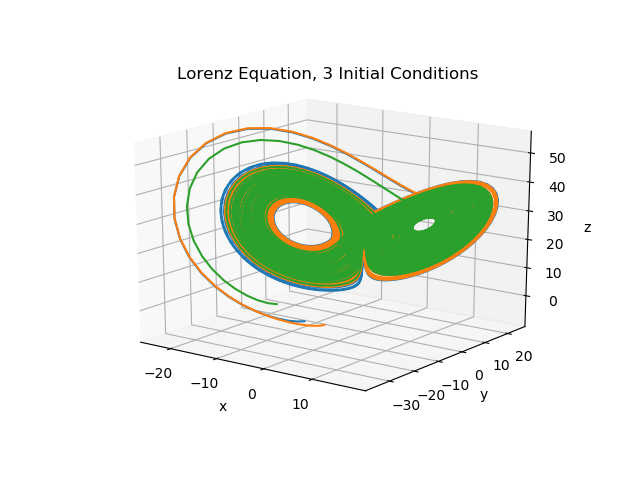

In [6]:
t = np.linspace(0, 100, 10000)

plt.figure(1)
ax = plt.axes(projection="3d")
for i in range(3):
    y_0 = uniform(-15, 15).rvs(3)
    
    sol = odeint(lorenz, y_0, t)

    ax.plot3D(sol[:,0], sol[:,1], sol[:,2])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

plt.title("Lorenz Equation, 3 Initial Conditions")
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [13]:
# Initial Condition and slightly perturbed initial condition
y_0 = uniform(-15, 15).rvs(3)
y_1 = y_0 + np.random.randn(3)*(1e-10)
t = np.linspace(0, 100, 10000)

# Get solution data to Lorenz Equations
lorenz_data1 = odeint(lorenz, y_0, t)
lorenz_data2 = odeint(lorenz, y_1, t)

# Create figure
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize empty plots
lorenz_line1, = plt.plot([], [], [], marker='o')
lorenz_traj1, = plt.plot([], [], [])
lorenz_line2, = plt.plot([], [], [], marker='o')
lorenz_traj2, = plt.plot([], [], [])

# Create update function. Update for each i in range(frames)
def update(i):
    # update lorenz line and trajectory data
    lorenz_line1.set_data(lorenz_data1[i,0], lorenz_data1[i,1])
    lorenz_line1.set_3d_properties(lorenz_data1[i,2])
    lorenz_traj1.set_data(lorenz_data1[:i,0], lorenz_data1[:i,1])
    lorenz_traj1.set_3d_properties(lorenz_data1[:i,2])
    
    lorenz_line2.set_data(lorenz_data2[i,0], lorenz_data2[i,1])
    lorenz_line2.set_3d_properties(lorenz_data2[i,2])
    lorenz_traj2.set_data(lorenz_data2[:i,0], lorenz_data2[:i,1])
    lorenz_traj2.set_3d_properties(lorenz_data2[:i,2])
    
    return lorenz_line1, lorenz_traj1, lorenz_line2, lorenz_traj2

# Animate figure
ax.set_title("Animated Lorenz Equation w/ Two Almost Identical Initial Conditions")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim([-20, 20])
ax.set_ylim([-30, 30])
ax.set_zlim([0, 50])

ax.legend()
animation.writer = animation.writers['ffmpeg']
ani = animation.FuncAnimation(fig, update, frames=range(len(t)), interval=20)
ani.save('lorenz_animation1.mp4')
plt.ion()
plt.close()
# plt.show()

No handles with labels found to put in legend.


RuntimeError: Requested MovieWriter (ffmpeg) not available

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [14]:
# Initial Condition and slightly perturbed initial condition
y_0 = uniform(-15, 15).rvs(3)
t = np.linspace(0, 100, 10000)

# Get solution data to Lorenz Equations
lorenz_data1 = odeint(lorenz, y_0, t, atol=1e-15, rtol=1e-13)
lorenz_data2 = odeint(lorenz, y_0, t, atol=1e-12, rtol=1e-10)

# Create figure
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize empty plots
lorenz_line1, = plt.plot([], [], [], marker='o')
lorenz_traj1, = plt.plot([], [], [])
lorenz_line2, = plt.plot([], [], [], marker='o')
lorenz_traj2, = plt.plot([], [], [])

# Create update function. Update for each i in range(frames)
def update(i):
    # update lorenz line and trajectory data
    lorenz_line1.set_data(lorenz_data1[i,0], lorenz_data1[i,1])
    lorenz_line1.set_3d_properties(lorenz_data1[i,2])
    lorenz_traj1.set_data(lorenz_data1[:i,0], lorenz_data1[:i,1])
    lorenz_traj1.set_3d_properties(lorenz_data1[:i,2])
    
    lorenz_line2.set_data(lorenz_data2[i,0], lorenz_data2[i,1])
    lorenz_line2.set_3d_properties(lorenz_data2[i,2])
    lorenz_traj2.set_data(lorenz_data2[:i,0], lorenz_data2[:i,1])
    lorenz_traj2.set_3d_properties(lorenz_data2[:i,2])
    
    return lorenz_line1, lorenz_traj1, lorenz_line2, lorenz_traj2

# Animate figure
ax.set_title("Animated Lorenz Equation w/ Two Almost Identical Initial Conditions")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim([-20, 20])
ax.set_ylim([-30, 30])
ax.set_zlim([0, 50])

ax.legend()
animation.writer = animation.writers['ffmpeg']
ani = animation.FuncAnimation(fig, update, frames=range(len(t)), interval=20)
ani.save('lorenz_animation2.mp4')
plt.ion()
plt.close()
# plt.show()

No handles with labels found to put in legend.


RuntimeError: Requested MovieWriter (ffmpeg) not available

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


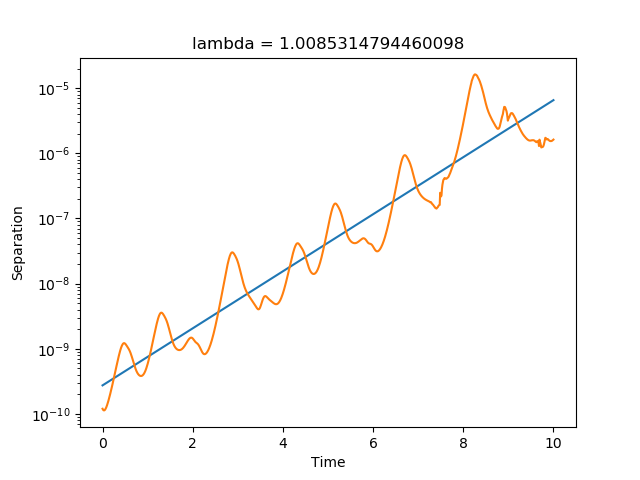

In [49]:
# Initial condition
y_0 = uniform(-15, 15).rvs(3)
t = np.linspace(0, 10, 1000)
# Initial Condition that lies in attractor
y_0 = odeint(lorenz, y_0, t)[-1]
# Perturbed initial condition
y_1 = y_0 + np.random.randn(3)*(1e-10)

# Solve using both initial conditions
sol1 = odeint(lorenz, y_0, t)
sol2 = odeint(lorenz, y_1, t)

delta_t = norm(sol1 - sol2, axis=1)

line = linregress(t, np.log(delta_t))

plt.figure(21)
plt.semilogy(t, np.exp(line[0] * t + line[1]))
plt.semilogy(t, delta_t)
plt.title("lambda = " + str(line[0]))
plt.xlabel("Time")
plt.ylabel("Separation")
plt.show()